# 範例

根據以下的參考點，嘗試做透視變換

```
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./D00_lena.png')

## 透視轉換

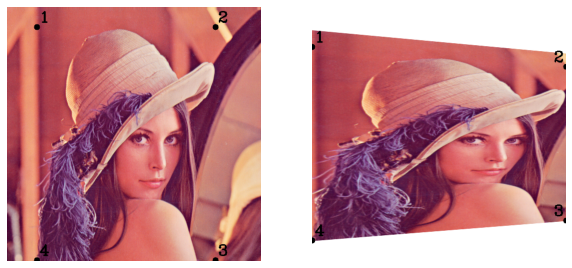

In [2]:
img_perspective = img.copy()
h, w = img.shape[:2]

# 設定四對點，並取得 perspective 矩陣
point1 = np.float32([[60, 40], [420, 40], [420, 510], [60, 510]])
point2 = np.float32([[0, 80], [w, 120], [w, 430], [0, 470]])
M = cv2.getPerspectiveTransform(point1, point2)

# perspective 轉換
img_perspective = cv2.warpPerspective(img, M, (w, h), borderValue = (255,255,255))

# 組合 + 顯示圖片
plt.figure(figsize = (10, 5))
for i, pair in enumerate(zip([point1, point2], [img.copy(), img_perspective])):
    for idx, pts in enumerate(pair[0]):
        pts = tuple(map(int, pts))
        cv2.circle(pair[1], pts, 6, (0, 0, 0), -1)
        cv2.putText(pair[1], str(idx+1), (pts[0]+(-25 if pts[0] == w else 5), pts[1]-10),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.subplot(1, 2, i+1).imshow(pair[1][...,[2, 1, 0]])
    plt.axis('off')
plt.show()